# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [17]:
#!pip install google-colab

  Created wheel for google-colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102299 sha256=af5a392e880931bdbab6682c5d5311c82d3cba82329f0fe37746734c16bffa9d
  Stored in directory: C:\Users\Subodh.Pushpak\AppData\Local\pip\Cache\wheels\38\0d\59\701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Created wheel for portpicker: filename=portpicker-1.2.0-cp37-none-any.whl size=13374 sha256=6fb508ebd3c2a789841d0ce1fd43475f9c81b317e2fa35701ebef109e763b484
  Stored in directory: C:\Users\Subodh.Pushpak\AppData\Local\pip\Cache\wheels\4a\45\47\1e126be9d4605e71f00d6e6fb151611f2f4cb9770b050c7d2d
  Created wheel for tornado: filename=tornado-4.5.3-cp37-cp37m-win_amd64.whl size=425595 sha256=147c5dc51084761b473569d952bc4612f9dbce76315c47f22b1ea67f6cd34c0a
  Stored in directory: C:\Users\Subodh.Pushpak\AppData\Local\pip\Cache\wheels\72\bf\f4\b68fa69596986881b397b18ff2b9af5f8181233aadcc9f76fd
Successfully built google-colab portpicker tornado
  Found existing installation: six 1.14.0
    Un

ERROR: tensorboard 2.1.1 has requirement google-auth<2,>=1.6.3, but you'll have google-auth 1.4.2 which is incompatible.
ERROR: spyder-kernels 0.5.2 has requirement ipykernel>=4.8.2, but you'll have ipykernel 4.6.1 which is incompatible.
ERROR: penaltymodel-lp 0.1.0 has requirement numpy<1.16.0,>=0.0.0, but you'll have numpy 1.18.2 which is incompatible.
ERROR: jupyter-kernel-gateway 2.4.0 has requirement notebook<7.0,>=5.7.6, but you'll have notebook 5.2.2 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt_toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.18 which is incompatible.
ERROR: dwave-ocean-sdk 1.5.0 has requirement numpy<1.16.0, but you'll have numpy 1.18.2 which is incompatible.
ERROR: dwave-neal 0.5.2 has requirement numpy<1.16.0,>=1.14.0, but you'll have numpy 1.18.2 which is incompatible.
ERROR: dwave-hybrid 0.4.1 has requirement numpy<1.16.0,>=1.15.0, but you'll have numpy 1.18.2 which is incompatible.
ERROR: distributed 2.5.2 has require

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Change current working directory to project folder (1 mark)

In [ ]:
import os
import pandas as pd
import cv2
#### Add your code here ####
#os.chdir('/content/drive/My Drive/AIML/AdvCompVis/Project1/')

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
#data = #### Add your code here ####
data= np.load('images.npy',allow_pickle=True)

In [ ]:
print('number of images in the given dataset is: ',data.shape[0])

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

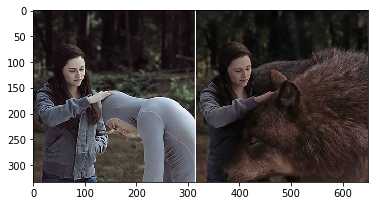

In [8]:
#### Add your code here ####
from matplotlib import pyplot as plt 
plt.imshow(data[0][0])

Image index number:  176


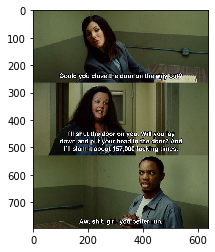

In [13]:
img_num=np.random.randint(0,data.shape[0])
plt.imshow(data[img_num][0])
print('Image index number: ',img_num)

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [14]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [15]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

MemoryError: Unable to allocate 157. MiB for an array with shape (409, 224, 224) and data type float64

### Print the shape of X_train and mask array  (2 marks)

In [0]:
#### Add your code here ####

In [0]:
#### Add your code here ####

### Print a sample image and image array

In [0]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

In [0]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = #### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####

    return #### Add your code here ####

### Call the create_model function

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    return #### Add your code here ####

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
#### Add your code here ####

### Get the predicted mask for a sample image   (5 marks)

In [0]:
n = 10
sample_image = X_train[n]

#### Add your code here ####

### Impose the mask on the image (5 marks)

In [0]:
#### Add your code here ####